In [1]:
import os
import sys
import numpy as numpy
from numpy import ndarray
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot
from typing import List

base_dir: str = os.getcwd()
os.environ['LAMMPS_PYTHON_BASE_PATH'] =  os.path.join(base_dir, '../../../../md-analysis-tutorial/python/src')
sys.path.append(os.getenv('LAMMPS_PYTHON_BASE_PATH'))

from modules.line_graph import LineGraph

# Extract time and PEG length data from `ave_PEG_end_to_end_distance.dat` file and convert to ps & nm respectively

In [2]:
# Unpack time and PEG length data
time, peg_length = numpy.loadtxt(
    os.path.join(base_dir, '../data/raw/length-vs-time/ave_PEG_end_to_end_distance.dat')
).T

# Convert time from femtoseconds to picoseconds
time /= 1000

# Convert PEG length data from Å (10e-10) to nm (10e-9)
peg_length /= 10

# Combine time and PEG length data into ndarray
peg_length_vs_time_data_array: List[ndarray] = [
    numpy.vstack((time, peg_length))
]

# Create Matplotlib graph to plot PEG end-to-end length vs time

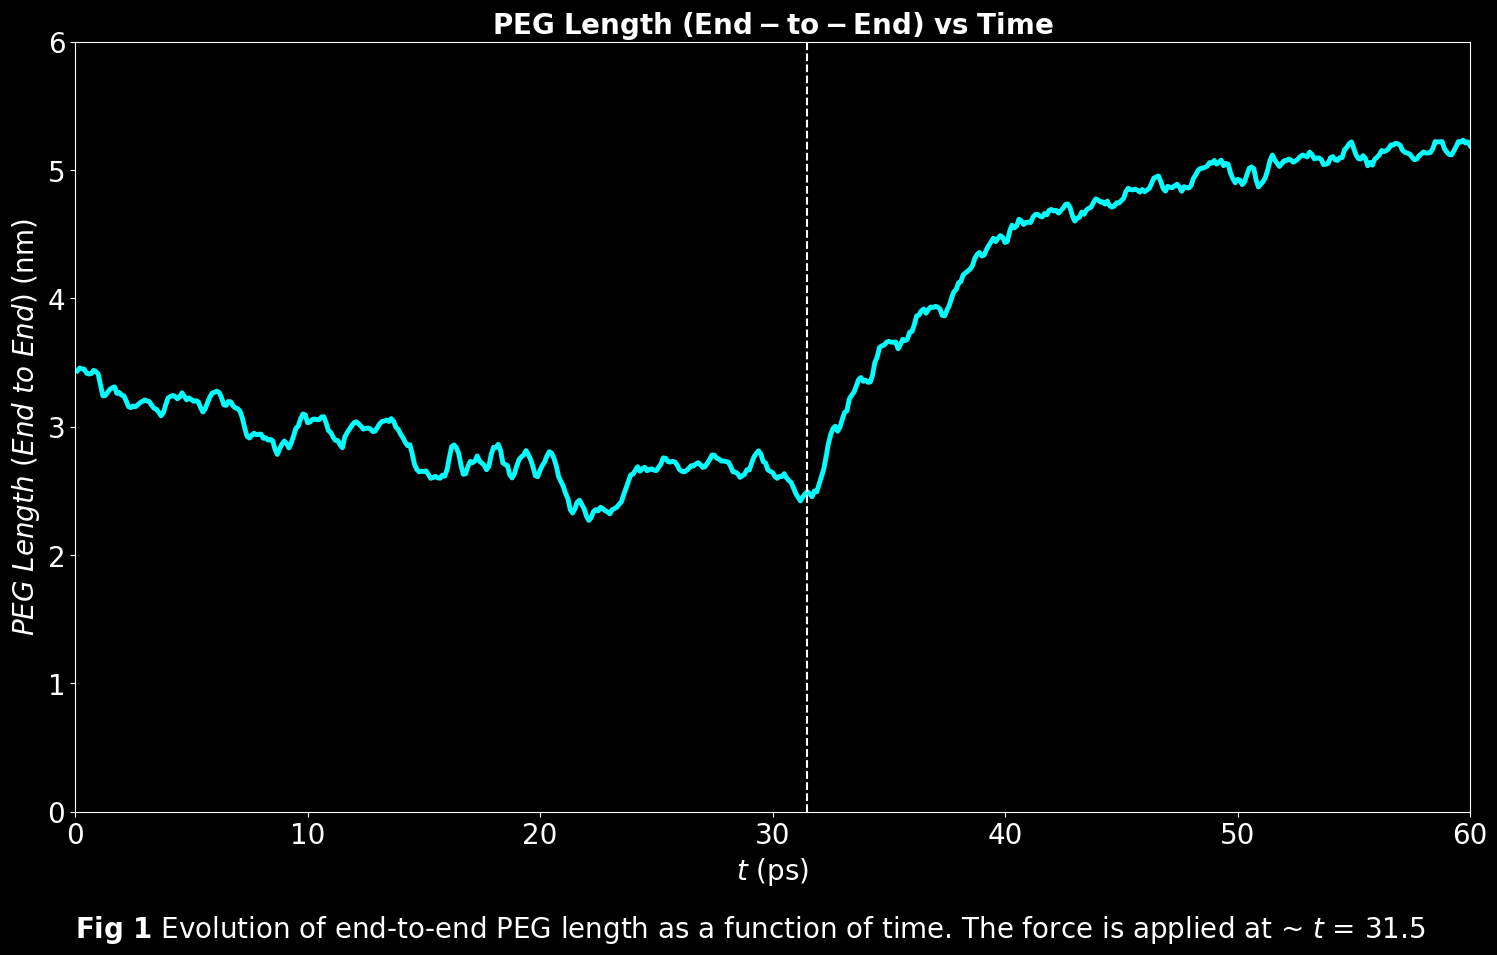

In [3]:
# Create 'PEG length vs time' line graph
LineGraph.single_line_graph(
    data_arrays=peg_length_vs_time_data_array,
    figure_size=(18, 10),
    line_colours=['cyan'],
    x_label=r'$t$ (ps)',
    y_label=r'$PEG\ Length\ (End\ to\ End)$ (nm)',
    x_lim=(0, 60),
    y_lim=(0, 6),
    graph_title=r'$\bf{PEG\ Length\ (End-to-End)\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 1}$ Evolution of end-to-end PEG length as a function of time. The force is applied at '
                r'~ $t$ = 31.5',
    figure_text_font_size=20,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.0075,
    font_size=20,
    tick_label_size=20,
    line_width=3.5,
    save_path=os.path.join(base_dir, '../reports/figures/graphs/peg-length-vs-time.png'),
    dashed_lines=[('x', 31.5)]
)